<h1><center><b>Classical ML Models : Random Forest</b></center></h1>

## Import and Load Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the preprocessed training and test datasets
train_data = pd.read_csv('dataset_preprocessed/LinearImput_Feature_Scale_Cap_Clean_Train.csv')
test_data = pd.read_csv('dataset_preprocessed/LinearImput_Feature_Scale_Cap_Clean_Test.csv')

In [3]:
# Separate features and target from the training dataset
X_train = train_data.drop(columns=['target'])
Y_train = train_data['target']
X_test = test_data.drop(columns=['target'])
Y_test = test_data['target']

## RandomForest

In [4]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

Accuracy: 97.71%

Confusion Matrix:
[[232919   4115]
 [  1883  22795]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.92      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.95      0.94    261712
weighted avg       0.98      0.98      0.98    261712



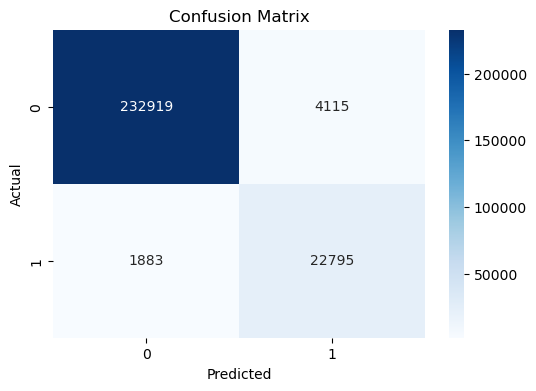

In [5]:
# Make predictions on the test set
Y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# Visualizing the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Precision, Recall, F1-Score
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Precision: 0.85
Recall: 0.92
F1-Score: 0.88
ROC-AUC: 0.95


## RandomForest with class weights
Class Weighting in the Model

In [7]:
# Train the model with class weights to handle imbalance
rf_model_weighted = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model_weighted.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Weighted Random Forest Accuracy: 97.59%

Confusion Matrix:
[[233162   3872]
 [  2438  22240]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.90      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.94      0.93    261712
weighted avg       0.98      0.98      0.98    261712



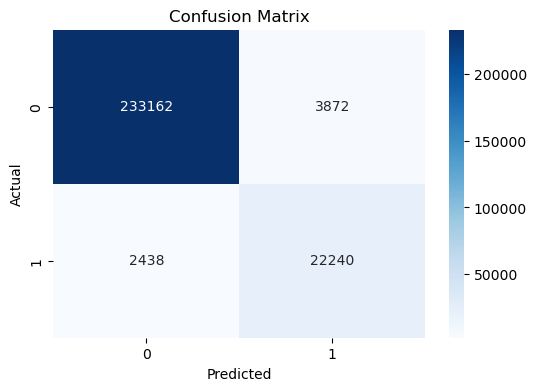

In [8]:
# Make predictions
Y_pred_weighted = rf_model_weighted.predict(X_test)

# Evaluate the model
accuracy_weighted = accuracy_score(Y_test, Y_pred_weighted)
print(f"Weighted Random Forest Accuracy: {accuracy_weighted * 100:.2f}%")

# Confusion matrix
cm_weighted = confusion_matrix(Y_test, Y_pred_weighted)
print("\nConfusion Matrix:")
print(cm_weighted)

# Classification report for more detailed evaluation
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_weighted))

# Visualizing the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Evaluation with Metrics for Imbalanced Data

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Precision, Recall, F1-Score
precision = precision_score(Y_test, Y_pred_weighted)
recall = recall_score(Y_test, Y_pred_weighted)
f1 = f1_score(Y_test, Y_pred_weighted)
roc_auc = roc_auc_score(Y_test, Y_pred_weighted)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Precision: 0.85
Recall: 0.90
F1-Score: 0.88
ROC-AUC: 0.94


## Cross Validation
cross-validation to avoid overfitting

In [13]:
from sklearn.model_selection import cross_val_score

# Cross-validation on the weighted Random Forest
cv_scores = cross_val_score(rf_model_weighted, X_train, Y_train, cv=5, scoring='f1')  # Using F1-score as the metric
print(f"Cross-validation F1-scores: {cv_scores}")
print(f"Mean F1-score: {cv_scores.mean():.2f}")

Cross-validation F1-scores: [0.87918588 0.87917526 0.87927093 0.87777672 0.881091  ]
Mean F1-score: 0.88
